<a href="https://colab.research.google.com/github/Ramilopez99/Churn/blob/main/2_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Red Neuronal Churn

Una red neuronal churn, también conocida como red neuronal de rotación de clientes, es un tipo de red neuronal artificial que se utiliza para predecir la probabilidad de que un cliente abandone una empresa o deje de utilizar sus productos o servicios.

## 1. Importación de librerías necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 2. Preproceso de datos

### a) Importación de los datos del dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Programación de Inteligencia Artificial/7. Redes Neuronales/Ejercicios/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

### b) Mostrar los datos del dataframe importado

In [ ]:
print(len(df))

7043


In [ ]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [ ]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### c) Modificación del dataframe

* Como se puede apreciar, la columna TotalCharges contiene valores numericos, pero estan almacenados en una columna de tipo object, por lo que habrá que cambiarlo

In [ ]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.TotalCharges = df.TotalCharges.fillna(0)

* Como estamos en un problema de regresión, los valores deberan ser numericos

In [ ]:
df = df.drop(['customerID'], axis=1)

le = preprocessing.LabelEncoder()
df['gender'] = le.fit_transform(df.gender.values)
df['Partner'] = le.fit_transform(df.Partner.values)
df['Dependents'] = le.fit_transform(df.Dependents.values)
df['PhoneService'] = le.fit_transform(df.PhoneService.values)
df['MultipleLines'] = le.fit_transform(df.MultipleLines.values)
df['InternetService'] = le.fit_transform(df.InternetService.values)
df['OnlineSecurity'] = le.fit_transform(df.OnlineSecurity.values)
df['OnlineBackup'] = le.fit_transform(df.OnlineBackup.values)
df['DeviceProtection'] = le.fit_transform(df.DeviceProtection.values)
df['TechSupport'] = le.fit_transform(df.TechSupport.values)
df['StreamingTV'] = le.fit_transform(df.StreamingTV.values)
df['StreamingMovies'] = le.fit_transform(df.StreamingMovies.values)
df['Contract'] = le.fit_transform(df.Contract.values)
df['PaperlessBilling'] = le.fit_transform(df.PaperlessBilling.values)
df['PaymentMethod'] = le.fit_transform(df.PaymentMethod.values)
df['Churn'] = le.fit_transform(df.Churn.values)

* Para entender la distribución de los datos en las columnas categóricas y determinar cómo manejarlas en el análisis o modelado de los datos vamos a ver cuantos valores posibles tiene cada columna

In [ ]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

##3. Separar datos de entrada y salida

In [ ]:
# separamos los datos entre datos de entrada y salida
input = df.drop('Churn', axis=1)
output = df['Churn']

# separamos los datos entre entrenamiento y prueba
input_train, input_test, output_train, output_test = train_test_split(input, output, train_size=0.75, random_state=1)

## 4.  Entrenamiento, predicción y evaluación del modelo 

In [ ]:
num_columnas = input_train.shape[1]
print(num_columnas)

19


In [ ]:
# instanciamos al modelo
model = Sequential()
model.add(Dense(12, input_dim=num_columnas, activation='relu')) # la capa de entrada tiene las mismas neuronas que el tamaño de los datos, a continuacion va una capa con 12 neuronas
model.add(Dense(8, activation='relu')) # capa intermedia con 8 neuronas
model.add(Dense(1, activation='sigmoid'))

# compilamos el modelo
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

# entrenamiento
history = model.fit(input_train, output_train, validation_data=(input_test, output_test), epochs=50, batch_size=10)

Epoch 1/50
529/529 [==============================] - 11s 17ms/step - loss: 2.3485 - accuracy: 0.6308 - val_loss: 0.5400 - val_accuracy: 0.7609
Epoch 2/50
529/529 [==============================] - 5s 10ms/step - loss: 0.6024 - accuracy: 0.7459 - val_loss: 0.4863 - val_accuracy: 0.7950
Epoch 3/50
529/529 [==============================] - 1s 3ms/step - loss: 0.5677 - accuracy: 0.7535 - val_loss: 0.4089 - val_accuracy: 0.7995
Epoch 4/50
529/529 [==============================] - 2s 3ms/step - loss: 0.5605 - accuracy: 0.7664 - val_loss: 0.4188 - val_accuracy: 0.7978
Epoch 5/50
529/529 [==============================] - 2s 3ms/step - loss: 0.6375 - accuracy: 0.7647 - val_loss: 0.8860 - val_accuracy: 0.5775
Epoch 6/50
529/529 [==============================] - 2s 3ms/step - loss: 0.5602 - accuracy: 0.7662 - val_loss: 0.4034 - val_accuracy: 0.7956
Epoch 7/50
529/529 [==============================] - 4s 8ms/step - loss: 0.5894 - accuracy: 0.7601 - val_loss: 0.5902 - val_accuracy: 0.6706
Epo

In [ ]:
# evaluamos el modelo
_, accuracy = model.evaluate(input_test, output_test)
print('Accuracy: %.2f' % (accuracy*100))

56/56 [==============================] - 0s 2ms/step - loss: 0.4671 - accuracy: 0.8024
Accuracy: 80.24


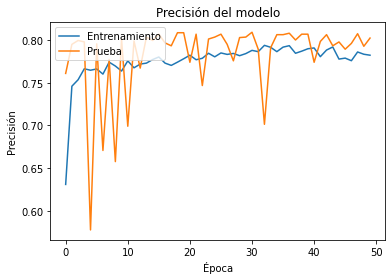

In [ ]:
# Graficar la precisión del modelo durante el entrenamiento
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Precisión del modelo')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()

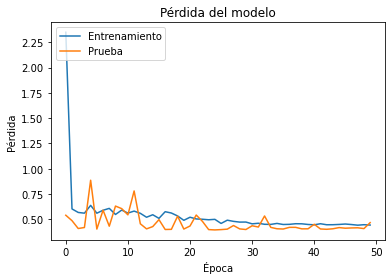

In [ ]:
# Graficar la pérdida del modelo durante el entrenamiento
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Pérdida del modelo')
plt.ylabel('Pérdida')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Prueba'], loc='upper left')
plt.show()